In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from engine import Heatmap, Noise

In [2]:
def plot_examples(colormaps):
    """Helper function to plot data with associated colormap."""
    np.random.seed(19680801)
    data = np.random.randn(500, 500)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(20, 20),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


In [3]:
# Naiwny perlin noise (powinien być symplex)
def generate_perlin_noise_2d(shape, res = (1,1)):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    shape,res = np.array(shape), np.array(res)
    delta = res / shape
    d = shape // res
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

def perlin(distance, resolution):
	return generate_perlin_noise_2d((resolution*distance, resolution*distance), (distance, distance))

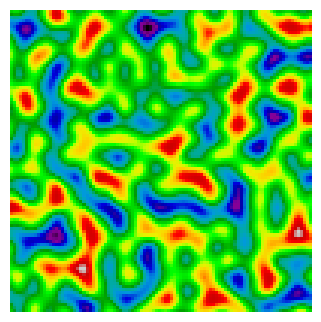

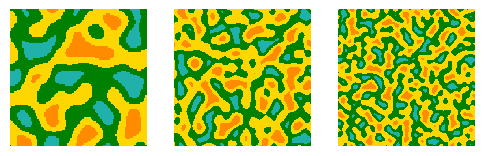

In [7]:
# Testy heatmapek D:
Heatmap(perlin(10, 10))
Heatmap(perlin(5, 20), perlin(10, 20), perlin(15, 20), scale = 1.0, cmap=ListedColormap(["darkorange", "gold", "green", "lightseagreen"]))

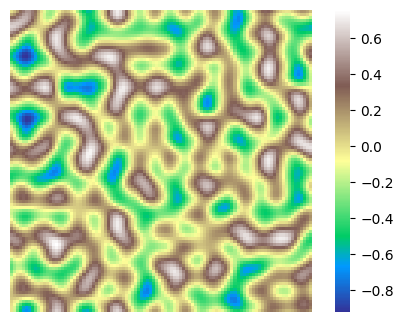

In [10]:
# kolorowanko
# https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#twoslopenorm-different-mapping-on-either-side-of-a-center
import matplotlib.colors as colors

colors_undersea = plt.cm.terrain(np.linspace(0, 0.05, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain = colors.LinearSegmentedColormap.from_list('terrain', all_colors)

Heatmap(perlin(10, 10), cmap='terrain', cbar=True)

In [6]:
Noise(perlin, distance = 10, resolution = 10)

# restricted (start, end, step):
Noise(perlin, distance = (1, 50, 3), resolution = (1, 20, 1))

interactive(children=(IntSlider(value=10, description='distance', max=30, min=-10), IntSlider(value=10, descri…

interactive(children=(IntSlider(value=25, description='distance', max=50, min=1, step=3), IntSlider(value=10, …